<a href="https://colab.research.google.com/github/HolyBayes/HSE_Intro2DL2021/blob/master/hometasks/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в глубинное обучение, ФКН ВШЭ

# Практическое задание 2. Рекуррентные Нейронные Сети

## Пример работы с kaggle

In [1]:
%%bash
mkdir kaggle_competition
pip install kaggle

  Using cached kaggle-1.5.10-py3-none-any.whl


mkdir: kaggle_competition: File exists
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
%cd kaggle_competition

/Users/a18245080/Anaconda/teaching/intro_to_dl/hometasks/kaggle_competition


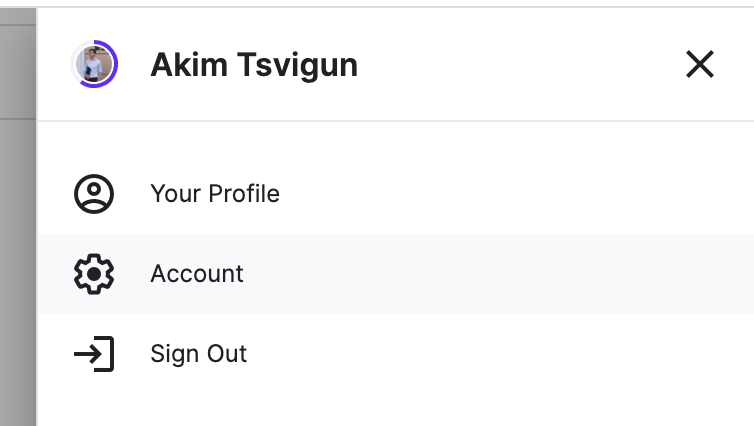

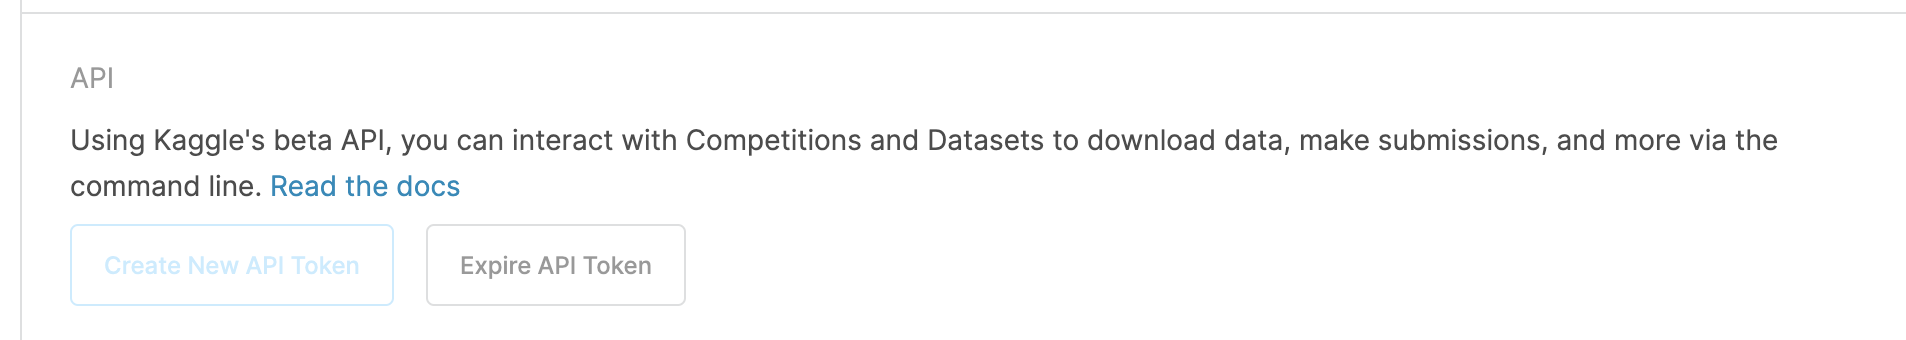

In [ ]:
!mv ~/Downloads/kaggle.json ~/.kaggle/

In [5]:
!kaggle competitions download -c nlp-intro-to-dl-2021
!unzip nlp-intro-to-dl-2021.zip

 76%|████████████████████████████▊         | 3.00M/3.95M [00:00<00:00, 6.21MB/s]
100%|██████████████████████████████████████| 3.95M/3.95M [00:00<00:00, 9.77MB/s]
Archive:  nlp-intro-to-dl-2021.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
train = pd.read_csv('./train.csv')
train.head()

,text,source
0,Российская сборная лидирует по итогам командно...,mchsgov
1,#СоветМЧС #МЧС #МЧСРОССИИ,mchsgov
2,Инспекторы ГИБДД Москвы приняли участие во Все...,mospolice
3,В Главную Военно-Морскую Базу БФ в г.Балтийск ...,mil
4,Обвиняемые в хищении денежных средств у 32 пож...,mospolice


In [7]:
test = pd.read_csv('./test.csv')
test.head()

,text
0,На полигоне «Погоново» Воронежской области про...
1,#БудниМЧС #МЧС #МЧСРОССИИ <br><br>Пожарные тра...
2,"Друзья, напоминаем вам, что завтра единый день..."
3,"Настольная игра: ""Королевская почта""<br><br>По..."
4,Миллиарды писем разносят по почтовым ящикам на...


In [8]:
# Remove empty observations and factorize target
train.dropna(axis=0, subset=['text'], inplace=True)
train['source'], keys = train['source'].factorize()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [10]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

In [11]:
pipe.fit(train.text, train.source)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

In [12]:
def acc(x, y):
    return np.mean(x == y)

print(acc(pipe.predict(train.text), train.source))
pred = pipe.predict(test.text.fillna(' '))
pred_labels = [keys[i] for i in pred]

0.9843781907290178


In [13]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub['Category'] = pred_labels
sample_sub.to_csv('my_submission.csv', index=0)

In [14]:
!kaggle competitions submit -c nlp-intro-to-dl-2021 -f my_submission.csv -m "Baseline submission"

100%|██████████████████████████████████████| 21.7k/21.7k [00:05<00:00, 3.99kB/s]
Successfully submitted to Texts classification